# Linear Regression Analysis and Prediction for IoT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
#use this cell to import additional libraries or define helper functions
from sklearn.metrics import mean_squared_error

## 1.1 Loading and preparing the data

In [3]:
#Load your data into a pandas dataframe here

df = pd.read_csv("Weather prediction cleaned data.csv")

In [4]:
#convert datetime to epoch/unix time
df['unix'] = (pd.to_datetime(df.Datetime)- pd.to_datetime('1970-01-01')).dt.total_seconds()

## 1.2 Predicting Temperature

In [5]:
# Setting the ph to be 10 days, as the data set values are recorded with an interval of 1 hr

ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Temperature)
ph = 10*24 #100 days
ph_index = round(ph/24)
mu = 0.01
#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)


In [6]:
#using linear regression to predict a rolling temperature for our dataset

for i in range(2, n_s+1):
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0] + ph #predicted time
    yp = m_tmp*tp + q_tmp
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp


In [7]:
# Calculate MSE
mse = mean_squared_error(ys.iloc[1:n_s].values, yp_pred)

print("Mean squared error for mu 0.01:", mse)

Mean squared error for mu 0.01: 0.013127786232540201


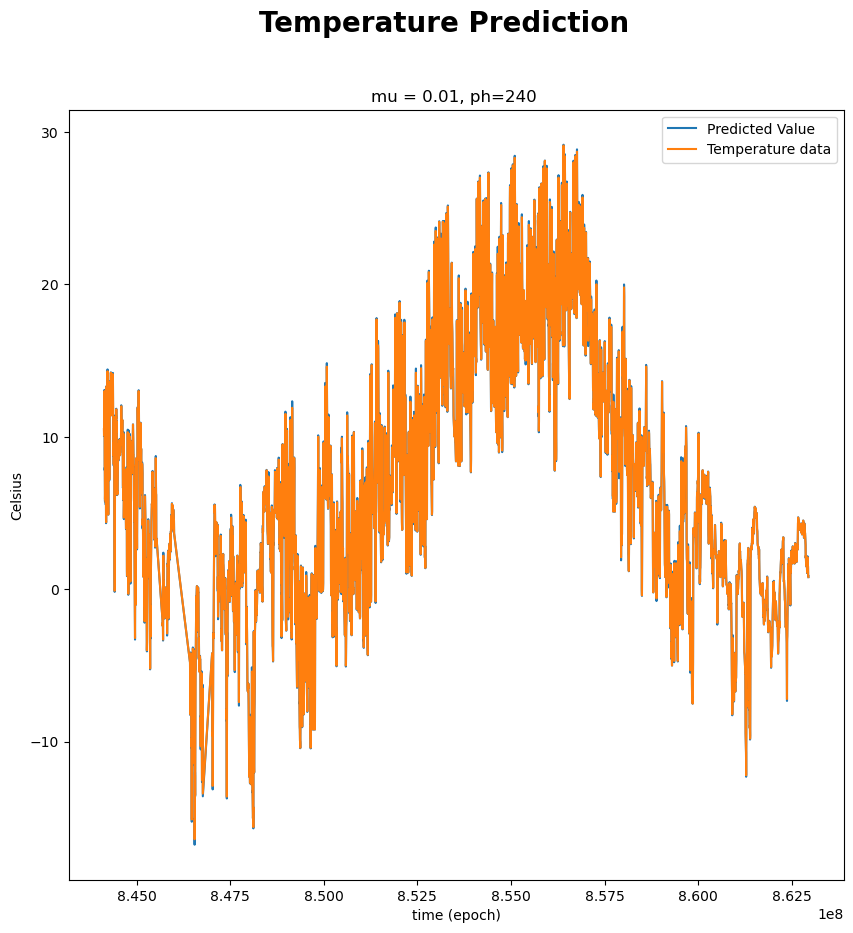

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temperature Prediction', fontsize=20, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Temperature data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Celsius')
ax.legend()


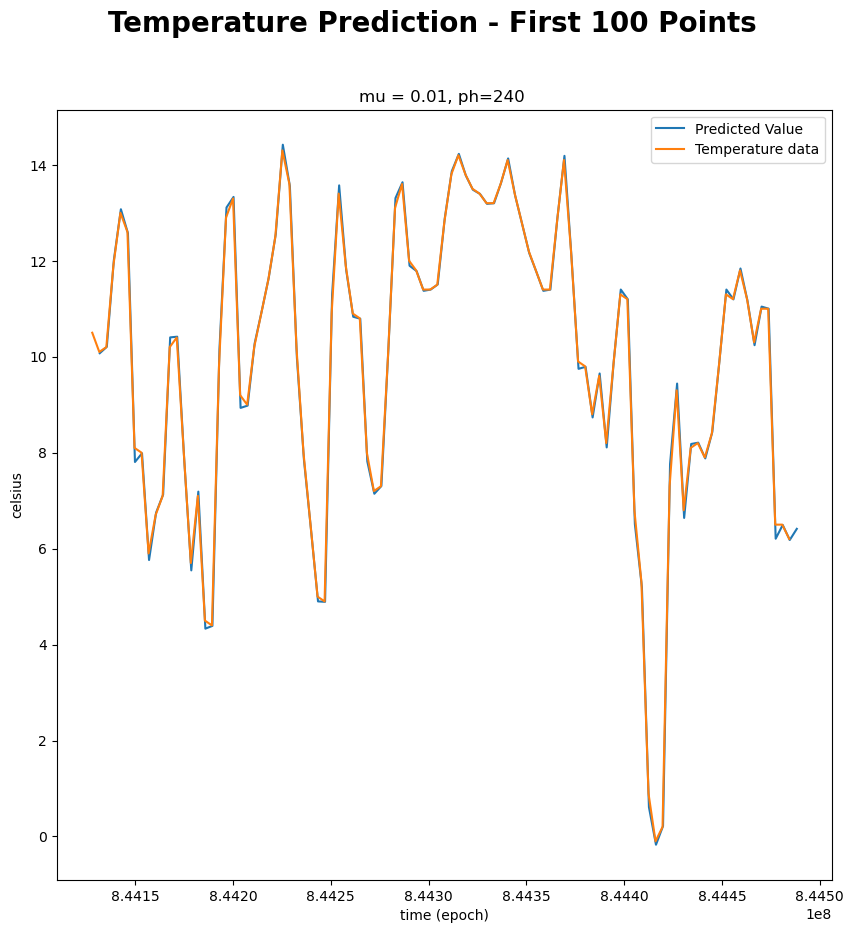

In [9]:
#Plot first 100 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temperature Prediction - First 100 Points', fontsize=20,fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:100], yp_pred[0:100], label='Predicted Value')
ax.plot(ts.iloc[0:100,0], ys.iloc[0:100,0], label='Temperature data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('celsius')
ax.legend()

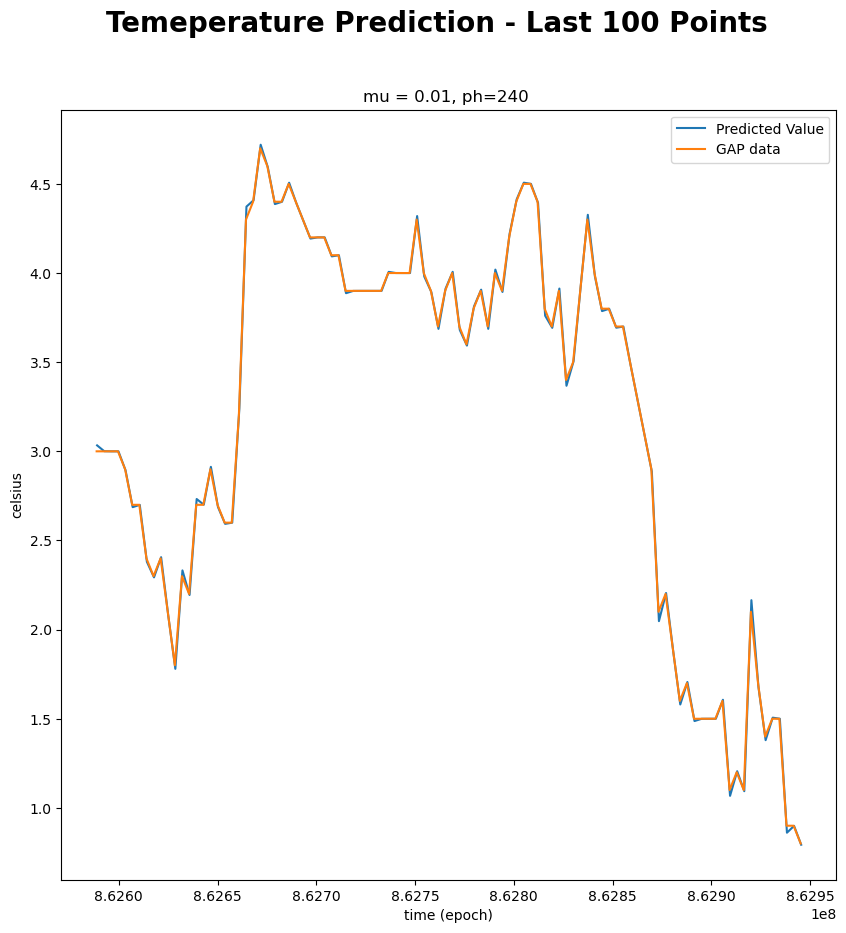

In [10]:
#Plot last 100 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temeperature Prediction - Last 100 Points', fontsize=20,fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-100:], yp_pred[-100:], label='Predicted Value')
ax.plot(ts.iloc[n_s-100:n_s,0], ys.iloc[n_s-100:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('celsius')
ax.legend()

### Predicting the model for mu = 0.5

In [11]:
# Setting the ph to be 10 days, as the data set values are recorded with an interval of 1 hr

ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Temperature)
ph = 10*24 #100 days
ph_index = round(ph/24)
mu = 0.5
#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [12]:
#using linear regression to predict a rolling temperature for our dataset

for i in range(2, n_s+1):
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0] + ph #predicted time
    yp = m_tmp*tp + q_tmp
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp


In [13]:
# Calculate MSE
mse = mean_squared_error(ys.iloc[1:n_s].values, yp_pred)

print("Mean squared error for mu 0.5:", mse)

Mean squared error for mu 0.5: 0.27896541632931476


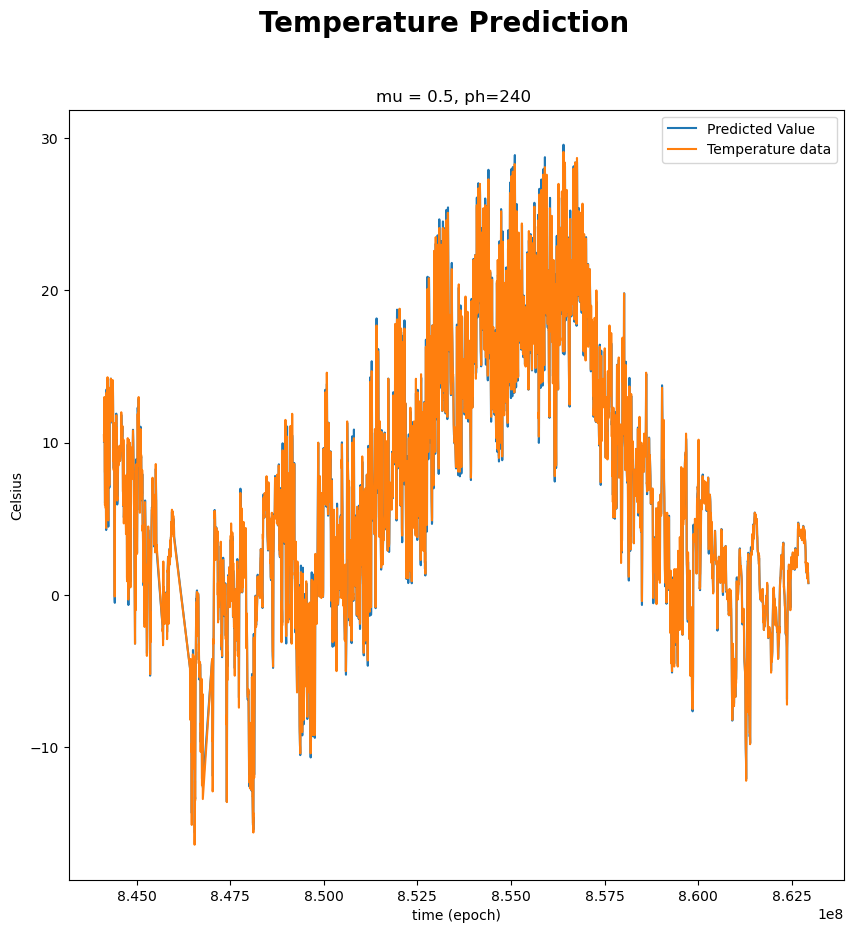

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temperature Prediction', fontsize=20, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Temperature data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Celsius')
ax.legend()

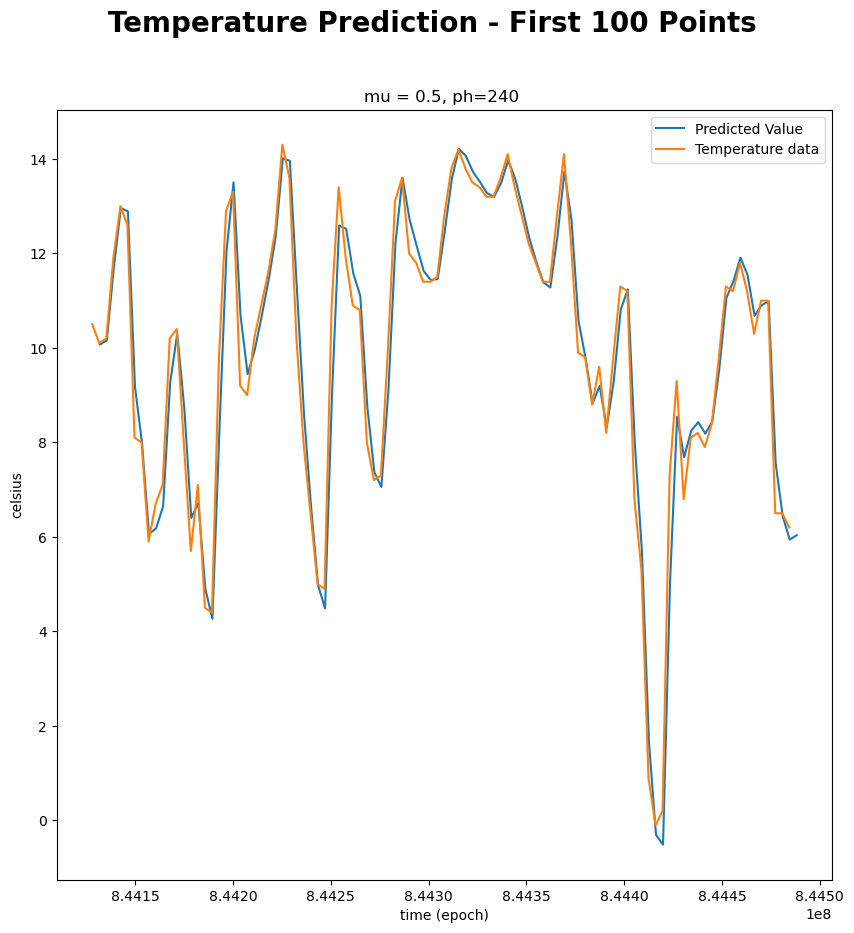

In [15]:
#Plot first 100 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temperature Prediction - First 100 Points', fontsize=20,fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:100], yp_pred[0:100], label='Predicted Value')
ax.plot(ts.iloc[0:100,0], ys.iloc[0:100,0], label='Temperature data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('celsius')
ax.legend()

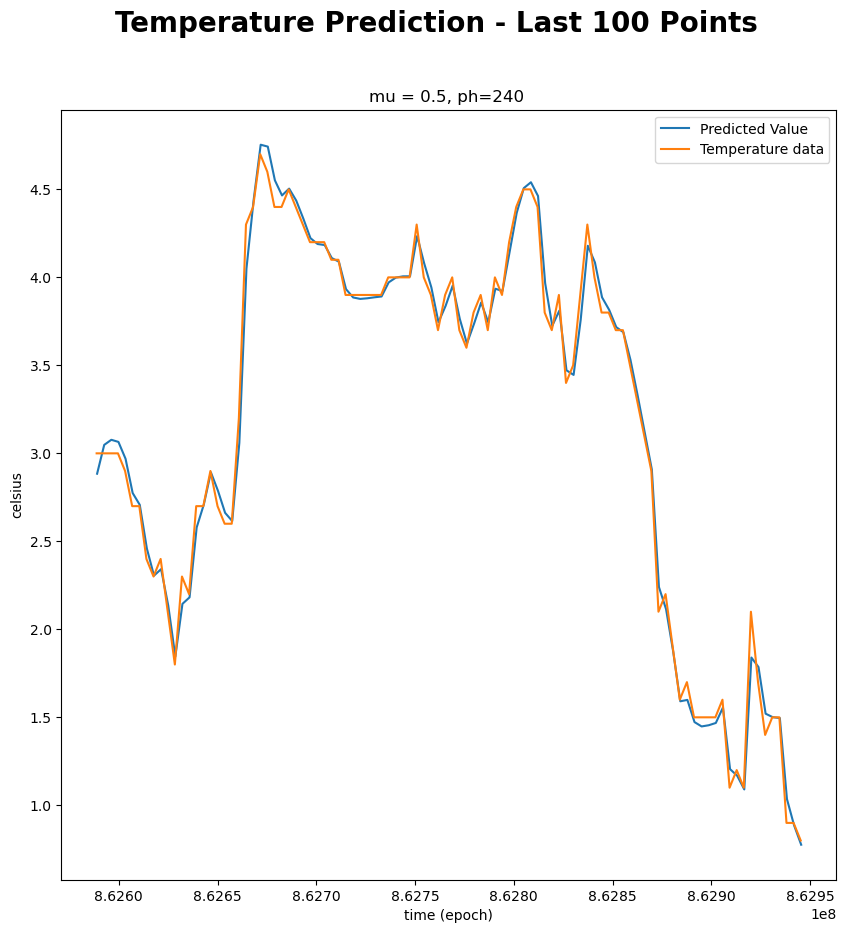

In [16]:
#Plot last 100 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temperature Prediction - Last 100 Points', fontsize=20,fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-100:], yp_pred[-100:], label='Predicted Value')
ax.plot(ts.iloc[n_s-100:n_s,0], ys.iloc[n_s-100:n_s,0], label='Temperature data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('celsius')
ax.legend()

### Predicting the model for mu = 1

In [17]:
ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Temperature)
ph = 10*24 #100 days
ph_index = round(ph/24)
mu = 1
#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [18]:
#using linear regression to predict a rolling temperature for our dataset

for i in range(2, n_s+1):
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    
    ns = len(ys_tmp)
    weights = np.ones(ns)*mu
    for k in range(ns):
        weights[k] = weights[k]**k
    weights = np.flip(weights, 0)
    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0] + ph #predicted time
    yp = m_tmp*tp + q_tmp
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

In [19]:
# Calculate MSE
mse = mean_squared_error(ys.iloc[1:n_s].values, yp_pred)

print("Mean squared error for mu is 1 : ", mse)

Mean squared error for mu is 1 :  66.29133847848726


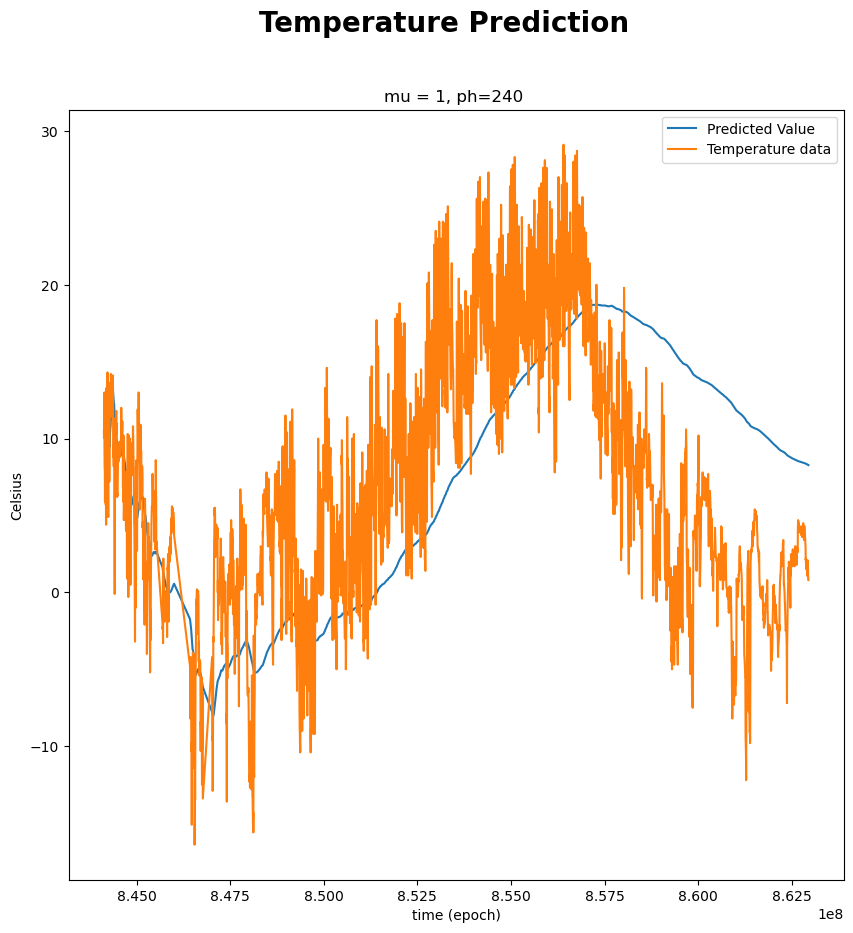

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temperature Prediction', fontsize=20, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Temperature data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('Celsius')
ax.legend()

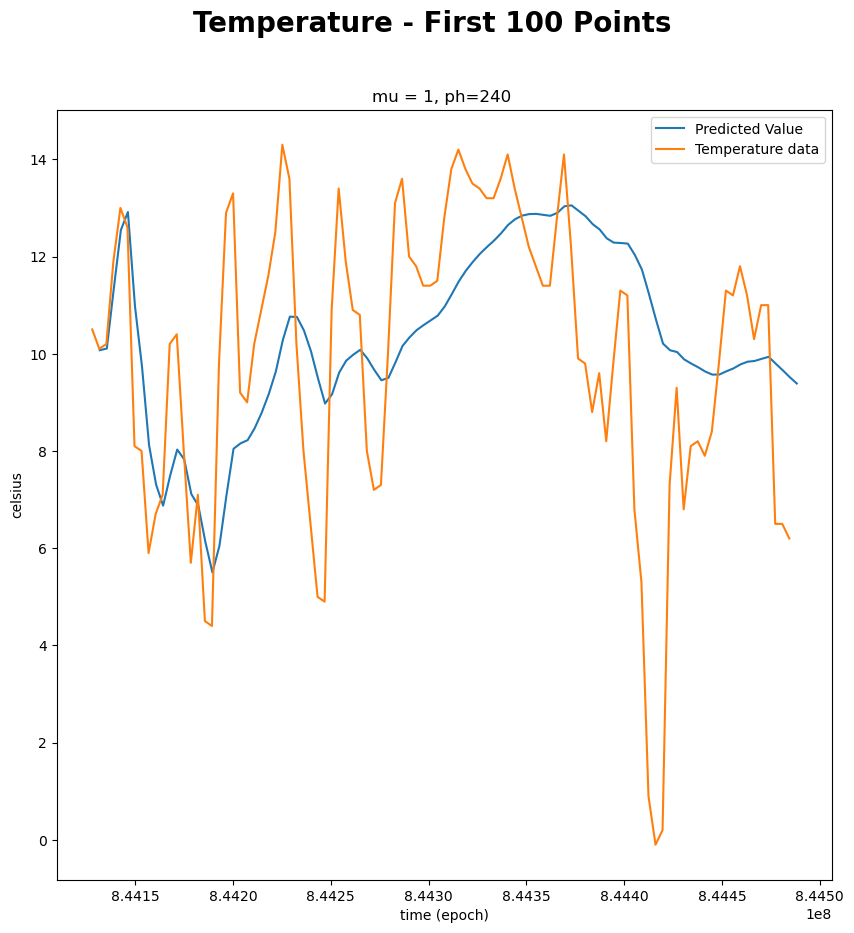

In [21]:
#Plot first 100 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temperature - First 100 Points', fontsize=20,fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:100], yp_pred[0:100], label='Predicted Value')
ax.plot(ts.iloc[0:100,0], ys.iloc[0:100,0], label='Temperature data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('celsius')
ax.legend()

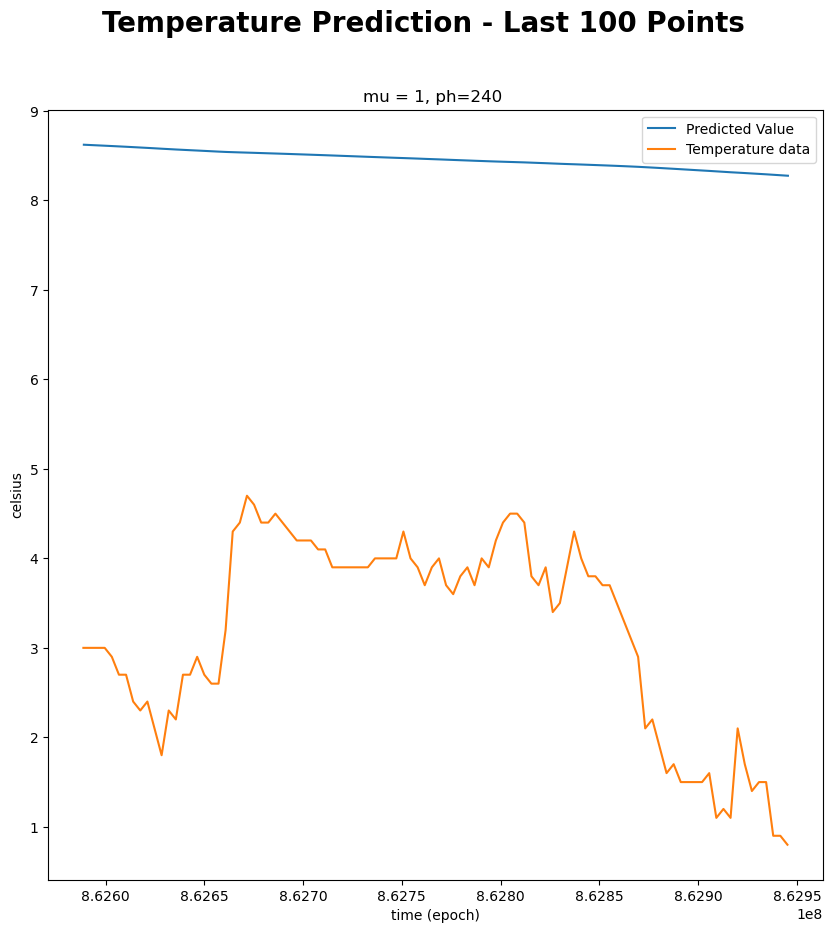

In [22]:
#Plot last 100 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Temperature Prediction - Last 100 Points', fontsize=20,fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-100:], yp_pred[-100:], label='Predicted Value')
ax.plot(ts.iloc[n_s-100:n_s,0], ys.iloc[n_s-100:n_s,0], label='Temperature data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('celsius')
ax.legend()

The report on the performance of the linear regression model with different values of `mu` is as follows:

- When `mu=0.01`, the model performs well with an MSE of 0.0131. This indicates that the predicted
  temperature values are close to the actual temperature values.

- When `mu=0.5`, the model performs poorly with an MSE of 0.278. This indicates that the predicted
  temperature values are far from the actual temperature values. This could be due to the high value of 
  `mu`, which leads to overfitting of the model.

- When `mu=1`, the model performs very poorly with an MSE of 66.29. This indicates that the predicted
  temperature values are very far from the actual temperature values. This could be due to the extremely high value of
  `mu`, which leads to severe overfitting of the model.

Therefore, it is important to choose an appropriate value of `mu` to achieve good performance of the linear regression model.
A value of `mu` that is too high or too low can result in poor performance of the model. In general, a lower value of `mu`
is preferred as it leads to better generalization of the model.